In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import math
import pickle
from models import *

In [15]:
def images_data(dtype):
    if dtype == 'train':
        data = open('train-images-idx3-ubyte', 'rb').read()
    else:
        data = open('t10k-images-idx3-ubyte', 'rb').read()
    index = 0
    fmt_header = '>IIII'
    magicnum, imagenum, rownum, colnum = struct.unpack_from(fmt_header, data, index)
    # 数据在缓存中的指针位置 index此时为16
    index += struct.calcsize('>IIII')  

    output = np.empty((imagenum, rownum * colnum))
    # 图像数据像素值类型Unsigned char型(B)同时大小为28*28 784
    fmt_image = '>' + str(rownum * colnum) + 'B'
    for i in range(imagenum):
        output[i] = np.array(struct.unpack_from(fmt_image, data, index)).reshape((1, rownum * colnum))/255.
        index += struct.calcsize(fmt_image)
    mu = np.mean(output, axis=1, keepdims=True)
    sigma = np.std(output, axis=1, keepdims=True)
    return output
def labels_data(dtype):
    if dtype == 'train':
        data = open('train-labels-idx1-ubyte', 'rb').read()
    else:
        data = open('t10k-labels-idx1-ubyte', 'rb').read()
    index = 0
    fmt_header = '>II'
    magicnum, labelnum = struct.unpack_from(fmt_header, data, index)

    index += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty((labelnum, 1))
    for i in range(labelnum):
        labels[i] = np.array(struct.unpack_from(fmt_image, data, index)[0]).reshape((1, 1))
        index += struct.calcsize(fmt_image)
    return labels

def testmodel(testdata, testlabel):
    paras = pickle.load(open('bestpara.pkl', 'rb'))
    hiddenlayer_output = np.maximum(np.matmul(testdata, paras['W1']) +  paras['b1'], 0)
    outlayer = np.maximum(np.matmul(hiddenlayer_output,  paras['W2']) +  paras['b2'], 0)
    prediction = np.argmax(outlayer, axis=1).reshape((len(testdata),1))
    accuracy = np.mean(prediction == testlabel)
    return accuracy, paras['W1'], paras['b1'], paras['W2'], paras['b2']

0.05/0.001/300


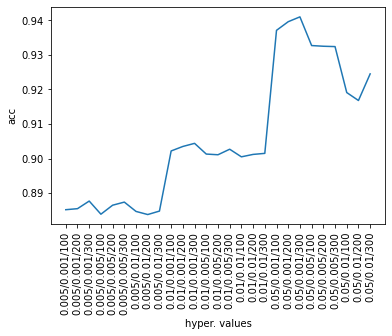

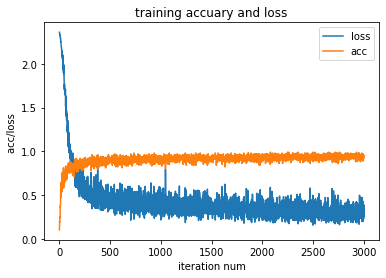

0.9408


In [28]:
if __name__ == '__main__':
    # 获取训练集/测试集 nparray型数据和标签
    traindata = images_data('train')
    trainlabel = labels_data('train')
    traindata = np.append(traindata, trainlabel, axis=1)

    testdata = images_data('test')
    testlabel = labels_data('test')

    # 网格搜索找到较优的超参
    output = findbest(traindata, testdata, testlabel)
    print(output[1])
    acclist = output[2]  

    x = acclist.keys()
    y = acclist.values()
    plt.xlabel('hyper. values')
    plt.xticks(rotation=90)
    plt.ylabel('acc')
    plt.plot(x, y)
    plt.show()
    with open('accuarylist.pkl', 'wb') as f:
        pickle.dump(acclist, f)

    finalmodel(0.05,0.001,300,traindata)

    print(testmodel(testdata, testlabel)[0])

(array([5.00000e+00, 4.20000e+01, 5.82000e+02, 7.88300e+03, 8.73530e+04,
        1.00818e+05, 3.54980e+04, 2.74900e+03, 2.42000e+02, 2.80000e+01]),
 array([-0.14607734, -0.11785285, -0.08962836, -0.06140387, -0.03317938,
        -0.00495489,  0.0232696 ,  0.05149409,  0.07971858,  0.10794307,
         0.13616756]),
 <BarContainer object of 10 artists>)

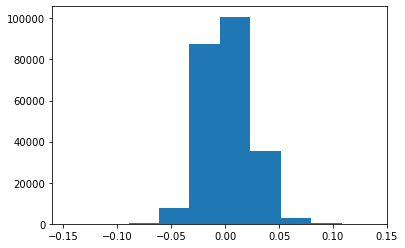

In [29]:
w1 = testmodel(testdata, testlabel)[1].flatten().tolist()
plt.hist(w1)

(array([ 1.,  2.,  2., 11., 39., 91., 72., 44., 26., 12.]),
 array([-0.12243125, -0.09960338, -0.07677551, -0.05394764, -0.03111977,
        -0.0082919 ,  0.01453597,  0.03736384,  0.06019171,  0.08301958,
         0.10584745]),
 <BarContainer object of 10 artists>)

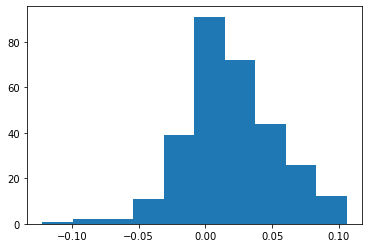

In [30]:
b1 = testmodel(testdata, testlabel)[2].flatten().tolist()
plt.hist(b1)

(array([ 10.,  31., 204., 525., 942., 740., 379., 133.,  31.,   5.]),
 array([-0.42227586, -0.33468979, -0.24710373, -0.15951767, -0.0719316 ,
         0.01565446,  0.10324052,  0.19082659,  0.27841265,  0.36599871,
         0.45358478]),
 <BarContainer object of 10 artists>)

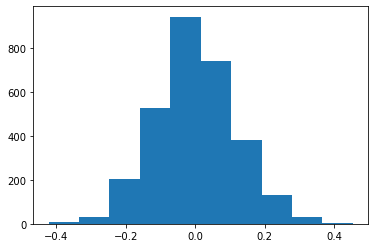

In [31]:
w2 = testmodel(testdata, testlabel)[3].flatten().tolist()
plt.hist(w2)

(array([1., 1., 0., 0., 3., 2., 2., 0., 0., 1.]),
 array([-0.34984347, -0.27770547, -0.20556748, -0.13342948, -0.06129148,
         0.01084651,  0.08298451,  0.15512251,  0.2272605 ,  0.2993985 ,
         0.3715365 ]),
 <BarContainer object of 10 artists>)

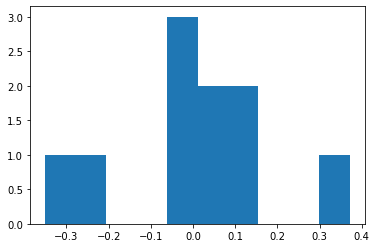

In [32]:
b2 = testmodel(testdata, testlabel)[4].flatten().tolist()
plt.hist(b2)